In [80]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [45]:
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [46]:
print(diabetes_X.shape)

(442, 1)


In [47]:
print(diabetes_X);

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

In [48]:
print(diabetes_y)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [49]:
print(diabetes_y.shape)

(442,)


(442,): This shape indicates a flat, one-dimensional array. It's a vector with 442 elements. In terms of indexing, you would access elements like array[i].

(442, 1): This shape also represents a one-dimensional array, but it's treated as a column vector or a matrix with one column. In terms of indexing, you would access elements like array[i, 0].

In [50]:
# diabetes_X split with the percentage
total_samples = len(diabetes_X)
train_percentage = 80

# Calculate the index for splitting
train_index = int((train_percentage / 100) * total_samples)
print(train_index)

353


In [51]:
# Split the target variable
diabetes_X_train = diabetes_X[:353]
diabetes_X_test = diabetes_X[353:]

In [52]:
print(diabetes_X_train)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

In [60]:
total_samples_y = len(diabetes_y)
train_percentage = 80

# Calculate the index for splitting
train_index_y = int((train_percentage / 100) * total_samples_y)
print(train_index_y)

353


In [61]:
diabetes_y_train = diabetes_X[:353]
diabetes_y_test = diabetes_X[353:]

In [62]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr = regr.fit(diabetes_X_train, diabetes_y_train)

In [65]:
diabetes_y_pred = regr.predict(diabetes_X_test)

In [64]:
print(diabetes_y_pred) #this is th one predicted by the model. it will be compared with the real one

[[-0.05578531]
 [ 0.04552903]
 [-0.00943939]
 [-0.03315126]
 [ 0.04984027]
 [-0.08488624]
 [ 0.00564998]
 [ 0.02073935]
 [-0.00728377]
 [ 0.10480869]
 [-0.02452876]
 [-0.00620595]
 [-0.03854032]
 [ 0.13714305]
 [ 0.17055523]
 [ 0.00241654]
 [ 0.03798434]
 [-0.05794093]
 [-0.00943939]
 [-0.02345095]
 [-0.0105172 ]
 [-0.03422907]
 [-0.00297252]
 [ 0.06816308]
 [ 0.00996123]
 [ 0.00241654]
 [-0.03854032]
 [ 0.02612841]
 [-0.08919748]
 [ 0.06061839]
 [-0.02884001]
 [-0.02991782]
 [-0.0191397 ]
 [-0.04069594]
 [ 0.01535029]
 [-0.02452876]
 [ 0.00133873]
 [ 0.06924089]
 [-0.06979687]
 [-0.02991782]
 [-0.046085  ]
 [ 0.01858372]
 [ 0.00133873]
 [-0.03099563]
 [-0.00405033]
 [ 0.01535029]
 [ 0.02289497]
 [ 0.04552903]
 [-0.04500719]
 [-0.03315126]
 [ 0.097264  ]
 [ 0.05415152]
 [ 0.12313149]
 [-0.08057499]
 [ 0.09295276]
 [-0.05039625]
 [-0.01159501]
 [-0.0277622 ]
 [ 0.05846277]
 [ 0.08540807]
 [-0.00081689]
 [ 0.00672779]
 [ 0.00888341]
 [ 0.08001901]
 [ 0.07139652]
 [-0.02452876]
 [-0.05470

In [66]:
print(diabetes_y_test)

[[-0.05578531]
 [ 0.04552903]
 [-0.00943939]
 [-0.03315126]
 [ 0.04984027]
 [-0.08488624]
 [ 0.00564998]
 [ 0.02073935]
 [-0.00728377]
 [ 0.10480869]
 [-0.02452876]
 [-0.00620595]
 [-0.03854032]
 [ 0.13714305]
 [ 0.17055523]
 [ 0.00241654]
 [ 0.03798434]
 [-0.05794093]
 [-0.00943939]
 [-0.02345095]
 [-0.0105172 ]
 [-0.03422907]
 [-0.00297252]
 [ 0.06816308]
 [ 0.00996123]
 [ 0.00241654]
 [-0.03854032]
 [ 0.02612841]
 [-0.08919748]
 [ 0.06061839]
 [-0.02884001]
 [-0.02991782]
 [-0.0191397 ]
 [-0.04069594]
 [ 0.01535029]
 [-0.02452876]
 [ 0.00133873]
 [ 0.06924089]
 [-0.06979687]
 [-0.02991782]
 [-0.046085  ]
 [ 0.01858372]
 [ 0.00133873]
 [-0.03099563]
 [-0.00405033]
 [ 0.01535029]
 [ 0.02289497]
 [ 0.04552903]
 [-0.04500719]
 [-0.03315126]
 [ 0.097264  ]
 [ 0.05415152]
 [ 0.12313149]
 [-0.08057499]
 [ 0.09295276]
 [-0.05039625]
 [-0.01159501]
 [-0.0277622 ]
 [ 0.05846277]
 [ 0.08540807]
 [-0.00081689]
 [ 0.00672779]
 [ 0.00888341]
 [ 0.08001901]
 [ 0.07139652]
 [-0.02452876]
 [-0.05470

diabetes_y_pred = regr.predict(diabetes_X_test) diabetes_X_test it is a piece of dataset i selected myself. with that i can find diabetes_y_pred. the prediction is going to be compared then with the actual diabetes_y_test 

In [58]:
print(regr.coef_)
print(mean_squared_error(diabetes_y_test, diabetes_y_pred))
print(r2_score(diabetes_y_test, diabetes_y_pred))

[[1.]]
5.524708540990008e-34
1.0


TRIAL 2 # Percentage instead of n_samples

Coefficients: 
 [957.76202681]
Mean squared error: 4079.82
Coefficient of determination: 0.36


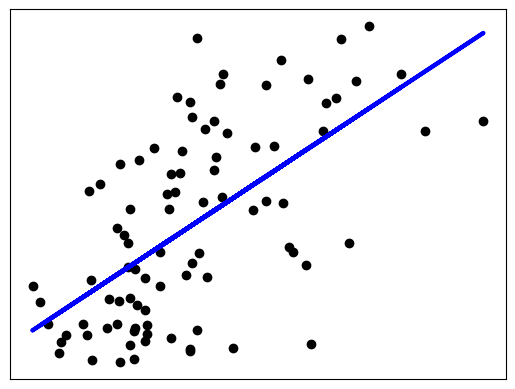

In [68]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

diabetes_X = diabetes_X[:, np.newaxis, 2]

# Element y
element_y = len(diabetes_y)
train_percentage = 80

# Calculate the index for splitting
train_index = int((train_percentage / 100) * element_y)

# Split the target variable
diabetes_y_train = diabetes_y[:train_index]
diabetes_y_test = diabetes_y[train_index:]

# X
element_x = len(diabetes_X)
train_percentage = 80

# Calculate the index for splitting
train_index_X = int((train_percentage / 100) * element_x)

# Split the target variable
diabetes_X_train = diabetes_X[:train_index_X]
diabetes_X_test = diabetes_X[train_index_X:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr = regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

They give different results. The first method calculates the split based on a percentage of the total samples, while the second method uses a fixed number of samples for testing (the last 20 samples).

The choice between these two methods depends on your specific goals and dataset characteristics. If you have enough data, the percentage-based split is often preferred as it maintains a more flexible approach. If your dataset is relatively small, a fixed number of samples for testing may be suitable.

LOGISTIC REGRESSION

In [74]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import numpy as np

iris = datasets.load_iris()

In [77]:
print(iris.data.shape)

(150, 4)


In [78]:
X = iris['data']
y = iris['target']

logit = LogisticRegression(max_iter = 10000)

print(logit.fit(X,y))

print(logit.score(X,y))

LogisticRegression(max_iter=10000)
0.9733333333333334


In [79]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()

X = iris['data']
y = iris['target']

logit = LogisticRegression(max_iter = 10000)

C = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

scores = []

for choice in C:
  logit.set_params(C=choice)
  logit.fit(X, y)
  scores.append(logit.score(X, y))

print(scores)

[0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9733333333333334, 0.98, 0.98, 0.9866666666666667, 0.9866666666666667]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x = x.reshape(-1, 1)

# Linear regression
regressor = LinearRegression()
regressor.fit(x, y)
y_fit = regressor.predict(x)

# Plot the original data points and the fitted line
plt.scatter(x[:10], y[:10], label='Data')
plt.plot(x[:10], y_fit[:10], label='Fitted Line', color='red')
plt.xlabel('Time - tzero (min)')
plt.ylabel('log(1 - a_data / DHinf_fit)')
plt.legend()
plt.show()

In [ ]:
slope = regressor.coef_[0]
intercept = regressor.intercept_

print(f"Slope: {slope}, Intercept: {intercept}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have a function DH defined
def DH(t, DHinf, k, tzero, n):
    return DHinf * (1 - np.exp(-k * (t - tzero)**n))

# Assuming you have your data loaded into t_data and a_data

# Logarithmic transformation
x = t_data - tzero_fit
y = np.log(1 - a_data / DHinf_fit)

# Reshape x for linear regression
x = x.reshape(-1, 1)

# Linear regression
regressor = LinearRegression()
regressor.fit(x, y)
y_fit = regressor.predict(x)

# Plotting
plt.scatter(x, y, label='Original Data')
plt.plot(x, y_fit, label='Linear Regression', color='red')
plt.xlabel('Time - tzero (min)')
plt.ylabel('log(1 - a_data / DHinf_fit)')
plt.legend()
plt.show()

# Print mean squared error
mse = mean_squared_error(y, y_fit)
print("Mean Squared Error:", mse)
